In [1]:
import json
import pandas as pd
from Bio import AlignIO
import matplotlib.pyplot as plt
import numpy as np

# ==== FILES ====
gene = "SEC16B_ENSGALT00000066144.2"
prefix="trimmed_prank_"

PATH = "/lustre/fs5/jarv_lab/scratch/adenisova/Inno_2025/tmp"
json_file = f"{PATH}/{prefix}meme_prank_small_results_inno/{gene}.json"
out_file = f"{PATH}/{prefix}meme_prank_small_results_inno/{gene}.out"

# SLC16A6_rna-XM_015279952.2.prot.fa
# aln_file = f"{PATH}/{gene}.prot.fa"
aln_file  = f"{PATH}/trimmed_prank_small_prank_fa_proteins/{gene}.fasta"

alignment = AlignIO.read(aln_file, "fasta")
aln_len = alignment.get_alignment_length()

foreground_species = pd.read_csv(
    "/lustre/fs5/jarv_lab/scratch/adenisova/Inno_2025/initial_data/foreground_species.tsv",
    sep="\s+",
)
df = pd.read_csv(f"{PATH}/{prefix}absrel_e_summary_per_gene_filter.csv", sep=",")
branches = df[df["gene"] == gene]["sig_branches"].values[0]
print(branches)

print(f"aln_len: {aln_len}")

['Agelaius_phoeniceus', 'Egretta_garzetta', 'Falco_peregrinus', 'Falco_tinnunculus', 'Parus_major', 'Passer_domesticus', 'Sturnus_vulgaris']
aln_len: 968


In [2]:
from Bio import AlignIO
import pandas as pd

# Читаем таблицу
df = foreground_species

# Сортируем: сначала по Pair_Number, затем high > low, затем по алфавиту для low
df['inno_rank'] = df['Inno'].apply(lambda x: 0 if x == 'high' else 1)
df = df.sort_values(['Pair_Number', 'inno_rank', 'Scientific_Name'])

# Читаем выравнивание
alignment = AlignIO.read(aln_file, 'fasta')

# Создаем словарь для быстрого доступа
seq_dict = {record.id: record for record in alignment}

# Сохраняем в нужном порядке
with open(f"{PATH}/filtered_alignments/{gene}.fasta", 'w') as f:
    for _, row in df.iterrows():
        species = row['Scientific_Name']
        if species in seq_dict:
            record = seq_dict[species]
            # print(record.description)
            if record.description in branches:
                record.description += "_selected"
            f.write(f">{record.description}\n{str(record.seq)}\n")

In [3]:
with open(out_file) as f:
    file = f.read()

lines_of_table = []
is_Table = False
header = None
for line in file.split("\n"):
    if is_Table and line.strip() != "" and not line.startswith("###"):
        if not header:
            header = [i.strip() for i in line.split("|") if i != ""]
        else:
            line_comp = [i.strip() for i in line.split("|") if i != ""]
            line_final =  line_comp[:7]
            line_final.append(','.join(line_comp[7:10]))
            lines_of_table.append(line_final)
            

    if line.startswith("### For partition 1 these sites are significant at p <=0.1"):
        is_Table = True
    
lines_of_table = lines_of_table[1:]
df_great = pd.DataFrame(lines_of_table, columns=header)
df_great

,Codon,Partition,alpha,"non-syn rate (beta) distribution, rates : weights",LRT,Episodic selection detected?,# branches,List of most common codon substitutions at this site
0,78,1,0.000,0.00/65.30 : 0.01/0.99,5.765,"Yes, p = 0.0254",1,"[2]caG>caC,[1]cCc>cAc,cCC>cAG,Ccc>Tcc"
1,99,1,0.000,0.00/53.93 : 0.01/0.99,5.689,"Yes, p = 0.0264",1,"[3]caC>caG,[2]cAc>cGc,[1]CAc>ACc,caC>caA,Cac>Tac"
2,114,1,0.000,0.00/43.73 : 0.01/0.99,5.379,"Yes, p = 0.0310",1,"[2]aGc>aAc,Agc>Ggc,[1]aGc>aCc"
3,163,1,1.832,0.95/467.02 : 0.63/0.37,4.207,"Yes, p = 0.0568",1,"[1]Gga>Cga,gGa>gCa,ggA>ggC,ggC>ggT"
4,167,1,1.575,0.80/242.99 : 0.41/0.59,8.814,"Yes, p = 0.0054",2,"[10]Ggc>Agc,[1]gGa>gCa,GGc>ACc,gGc>gAc,ggC>ggA..."
5,204,1,1.632,0.84/79.88 : 0.43/0.57,3.294,"Yes, p = 0.0915",0,"[7]Gtc>Atc,[2]aTc>aCc,[1]aCc>aTc,Acc>Gcc,atC>a..."
6,235,1,0.000,0.00/35.88 : 0.01/0.99,6.256,"Yes, p = 0.0198",1,[1]Ccc>Tcc
7,260,1,0.960,0.00/31.70 : 0.01/0.99,4.023,"Yes, p = 0.0625",0,"[7]Ggt>Agt,[1]gGt>gAt,gGt>gCt,ggT>ggC"
8,377,1,1.159,0.00/27.47 : 0.01/0.99,3.662,"Yes, p = 0.0754",1,"[1]aGa>aAa,aGa>aCa,agA>agG,Aga>Gga,aGg>aAg"
9,425,1,0.000,0.00/26.04 : 0.01/0.99,4.277,"Yes, p = 0.0548",0,"[5]aAc>aGc,[3]aaC>aaA,[2]aAc>aCc"


In [5]:
df_great["# branches"] = df_great["# branches"].apply(lambda x: int(x)) 

one_branch = df_great[df_great["# branches"] == 1]["Codon"].to_list()

two_branch = df_great[df_great["# branches"] == 2]["Codon"].to_list()

three_branch = df_great[df_great["# branches"] == 3]["Codon"].to_list()

couple_branch = df_great[df_great["# branches"] > 3]["Codon"].to_list()

In [ ]:
from pymsaviz import MsaViz, get_msa_testdata
# trimmed_small_fa_proteins filtered_alignments

for i in range(aln_len//100 + 1):
    end = (i+1)*100
    if end > aln_len:
        end = aln_len

    mv = MsaViz(
        f"{PATH}/filtered_alignments/{gene}.fasta",
        # aln_file, 
        show_count=True,
        show_consensus=True,
        wrap_length=100,
        start=1+i*100,
        end=end,
        color_scheme="Identity",
    )

    mv.add_markers([int(i) for i in one_branch], color = "blue")
    mv.add_markers([int(i) for i in two_branch], color = "green")
    mv.add_markers([int(i) for i in three_branch], color = "yellow")
    mv.add_markers([int(i) for i in couple_branch], color = "red")
    # mv.add_markers([int(i) for i in df_great["Codon"].tolist()])
    mv.savefig(f"{PATH}/alignment_pics_final/{gene}_{1+i*100}_{101+i*100}.pdf", dpi=300)

In [44]:
absrel = pd.read_csv(f"{PATH}/trimmed_prank_absrel_e_summary_per_gene_filter.csv", sep = ",")
absrel

# trimmed_prank_meme_prank_small_results_inno/rna-XM_015293919.2.out

def get_table_from_out(out_file):
    with open(out_file) as f:
        file = f.read()

    lines_of_table = []
    is_Table = False
    header = None
    for line in file.split("\n"):
        if is_Table and line.strip() != "" and not line.startswith("###"):
            if not header:
                header = [i.strip() for i in line.split("|") if i != ""]
            else:
                line_comp = [i.strip() for i in line.split("|") if i != ""]
                line_final =  line_comp[:7]
                line_final.append(','.join(line_comp[7:10]))
                lines_of_table.append(line_final)
                

        if line.startswith("### For partition 1 these sites are significant at p <=0.1"):
            is_Table = True
        
    lines_of_table = lines_of_table[1:]
    df_great = pd.DataFrame(lines_of_table, columns=header)
    return df_great

tables = []
for gene in absrel["gene"]:
    table = get_table_from_out(f"{PATH}/trimmed_prank_meme_prank_small_results_inno/{gene}.out")
    table["gene"] = gene

    tables.append(table)

In [50]:
table_final = pd.concat(tables)
table_final = table_final.dropna()#

table_final["# branches"].min()

'0'

In [46]:
gene = "ADPRHL2_rna-NM_001006312.1"
get_table_from_out(f"{PATH}/trimmed_prank_meme_prank_small_results_inno/{gene}.out")

,Codon,Partition,alpha,"non-syn rate (beta) distribution, rates : weights",LRT,Episodic selection detected?,# branches,List of most common codon substitutions at this site
0,3,1,4.941,0.00/1841.89 : 0.01/0.99,10.810,"Yes, p = 0.0020",1,"[1]GcG>AcT,GCG>CTC,gCg>gAg"
1,13,1,0.000,0.00/1358.18 : 0.01/0.99,10.149,"Yes, p = 0.0027",1,[1]tTC>tGG
2,14,1,18.548,0.00/1481.87 : 0.01/0.99,7.011,"Yes, p = 0.0134",1,"[2]cgG>cgC,[1]CGG>AAC,cgG>cgA,cgG>cgT"
3,17,1,10.339,0.00/357.19 : 0.01/0.99,6.627,"Yes, p = 0.0164",1,"[3]ttG>ttA,[1]TTg>CAg"
4,18,1,8.215,0.00/1565.44 : 0.01/0.99,12.375,"Yes, p = 0.0009",1,"[1]GCC>CAG,gcC>gcG,GcC>TcG"
5,34,1,0.000,0.00/1282.24 : 0.01/0.99,11.679,"Yes, p = 0.0013",1,"[1]aGc>aCc,AGC>GAG"
6,36,1,4.830,0.00/3811.08 : 0.01/0.99,8.576,"Yes, p = 0.0061",1,"[1]GTG>CCA,gtG>gtA"
7,39,1,9.071,0.00/351.86 : 0.01/0.99,7.359,"Yes, p = 0.0113",1,"[1]ccC>ccG,Ccc>Gcc,Ccc>Tcc,ccG>ccA,CCg>GAg"
8,Error:,,None,None,None,None,None,None
9,Internal error,,None,None,None,None,None,None


In [45]:
from pymsaviz import MsaViz, get_msa_testdata

mv = MsaViz(
    aln_file, 
    show_count=True,
    show_consensus=True,
    wrap_length=100,
    start=2480,
    end=2621,
)

mv.add_markers(df_great["site_n"].tolist()[5:])

mv.savefig(f"{PATH}/alignment_pics/{go}_end.png")

ValueError: start=2480, end=2621 is invalid MSA range (1 <= start <= end <= 757)

In [ ]:
trimmed_prank_absrel_e_summary_per_gene_filter.csv

In [ ]:
MsaViz(background="light").show()

pymsaviz.msaviz.MsaViz

In [23]:
mv = MsaViz(
    aln_file, 
    show_count=True,
    show_consensus=True,
    wrap_length=60,
    start=1,
    end=20,
)

In [19]:
df_great["site_n"].tolist()[5:]

[2498,
 2499,
 2500,
 2501,
 2502,
 2503,
 2507,
 2510,
 2512,
 2522,
 2524,
 2531,
 2532,
 2535,
 2537,
 2538,
 2549,
 2621,
 2820]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

alignment = AlignIO.read(aln_file, "fasta")
aln_len = alignment.get_alignment_length()
def visualize_site_window(alignment, site, window=21, figsize=(12, 6)):
    nseq = len(alignment)
    aln_len = alignment.get_alignment_length()

    # Convert to 0-based index
    pos = site

    # Window boundaries
    start = max(0, pos - window)
    end   = min(aln_len, pos + window + 1)

    # Extract window
    sub_alignment = [str(rec.seq[start:end]) for rec in alignment]
    names = [rec.id for rec in alignment]

    # Highlight central position
    central = pos - start
    # Also print ASCII block for quick inspection
    print("\nASCII view:")
    for name, row in zip(names, sub_alignment):
        row_str = ""
        for i, nt in enumerate(row):
            if i == central:
                row_str += f"[{nt}]"  # highlight central
            else:
                row_str += f" {nt} "
        print(f"{name:25s}  {row_str}")

# Например сайт №45 из df_great["site_n"]
site = int(df_great["site_n"].iloc[0])


df_great
visualize_site_window(alignment, 33)


ASCII view:
Lycocorax_pyrrhopterus      G  A  R  K  E  K  -  -  -  -  -  K  K  E  K  K  E  R  M  S  A [-] -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Sylvia_borin                G  A  R  K  E  K  -  -  -  -  -  K  K  E  K  K  E  R  M  S  A [-] -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Larus_fuscus                G  A  R  K  E  K  -  -  -  K  E  K  K  E  K  K  E  R  M  S  A [-] -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Larus_argentatus            G  A  R  K  E  K  -  -  -  K  E  K  K  E  K  K  E  R  M  S  A [-] -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Corvus_moneduloides         G  A  R  K  E  K  -  -  -  -  -  K  K  E  K  K  E  R  M  S  A [-] -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Falco_rusticolus            G  A  R  K  E  K  -  -  -  K  E  K  K  E  K  K  E  R  M  S  A [-] -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Hirundo_rustica             G  A  R  K  E  K 

In [28]:
df_great = df[
    (df["p-value"] < 0.05) &
    (df["# branches under selection"] >= 3) &
    (df["omega+"] > 1) &
    (df["p<sup>+</sup>"] > 0.05)
]
df_great

,&alpha;,&beta;<sup>1</sup>,p<sup>1</sup>,&beta;<sup>+</sup>,p<sup>+</sup>,LRT,p-value,# branches under selection,Total branch length,MEME LogL,FEL LogL,FEL &alpha;,FEL &beta;,site_n,omega+
2501,5.486109e-08,3.495041e-08,0.293193,439.698457,0.706807,43.057027,1.798418e-10,3,0,-19.969094,-17.151618,0.059757,0.0,2501,8.014760e+09


In [1]:
df_great

NameError: name 'df_great' is not defined

In [ ]:
for pos in df_great["site_n"]:
    visualize_site_window(alignment, pos)


ASCII view:
Lycocorax_pyrrhopterus      L  K  G  S  R  S  A  P  P  D  G  P  E  P  E  E  R  P  V  S  V [L] S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R  G  D  E 
Sylvia_borin                L  K  G  S  R  S  A  P  P  D  G  P  E  P  E  E  R  P  L  S  V [L] S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  L  G  D  E 
Larus_fuscus                L  K  G  S  R  S  A  P  P  E  G  P  K  A  E  E  R  P  V  S  V [L] S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R  G  D  E 
Larus_argentatus            L  K  G  S  R  S  A  P  P  E  G  P  E  A  E  E  R  P  V  S  V [L] S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R  G  D  E 
Corvus_moneduloides         L  K  G  S  R  S  A  P  P  D  G  P  E  P  E  E  R  P  V  S  V [L] S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R  G  D  E 
Falco_rusticolus            L  K  G  S  R  S  A  P  P  E  G  P  E  G  E  E  R  P  V  S  V [L] S  C  L  S  Y  R  K  R  P  S  L  K  D  S  I  G  G  R  G  D  E 
Hirundo_rustica             L  K  G  S  R  S 

In [33]:
df_great

,&alpha;,&beta;<sup>1</sup>,p<sup>1</sup>,&beta;<sup>+</sup>,p<sup>+</sup>,LRT,p-value,# branches under selection,Total branch length,MEME LogL,FEL LogL,FEL &alpha;,FEL &beta;,site_n,omega+
2501,5.486109e-08,3.495041e-08,0.293193,439.698457,0.706807,43.057027,1.798418e-10,3,0,-19.969094,-17.151618,0.059757,0.0,2501,8.014760e+09


In [31]:
nseq = len(alignment)
aln_len = alignment.get_alignment_length()

# Convert to 0-based index
pos = site

# Window boundaries
window = 40
start = max(0, pos - window)
end   = min(aln_len, pos + window + 1)

# Extract window
sub_alignment = [str(rec.seq[start:end]) for rec in alignment]
names = [rec.id for rec in alignment]

# Highlight central position
central = pos - start
# Also print ASCII block for quick inspection
print("\nASCII view:")
for name, row in zip(names, sub_alignment):
    row_str = ""
    for i, nt in enumerate(row):
        if i == central:
            row_str += f"[{nt}]"  # highlight central
        else:
            row_str += f" {nt} "
    print(f"{name:25s}  {row_str}")


ASCII view:
Lycocorax_pyrrhopterus      K  S  W  L  S  K  N  K  G  S  S  K  A  L  S  D  D  G  S  L  K  G  S  R  S  A  P  P  D  G  P  E  P  E  E  R  P  V  S  V [L] S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R  G  D  E  Q  T  L  F  S  A  L  G  E  R  P  P  S  P  E  R  P  P  R 
Sylvia_borin                K  S  W  L  S  K  N  K  G  S  S  K  A  L  S  D  D  G  S  L  K  G  S  R  S  A  P  P  D  G  P  E  P  E  E  R  P  L  S  V [L] S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  L  G  D  E  Q  T  L  F  S  A  L  G  E  R  P  P  S  P  E  R  P  P  R 
Larus_fuscus                K  S  W  L  S  K  S  K  G  S  S  K  A  L  S  D  D  G  S  L  K  G  S  R  S  A  P  P  E  G  P  K  A  E  E  R  P  V  S  V [L] S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R  G  D  E  Q  T  L  F  S  A  L  S  E  R  P  P  S  P  E  R  A  A  R 
Larus_argentatus            K  S  W  L  S  K  S  K  G  S  S  K  A  L  S  D  D  G  S  L  K  G  S  R  S  A  P  P  E  G  P  E  A  E  E  R  P  V  S  V [L] S  S  L  S  Y  R  K  R 

In [17]:
df_great = df[
    (df["p-value"] < 0.05) &
    (df["# branches under selection"] >= 2) &
    (df["omega+"] > 1) &
    (df["p<sup>+</sup>"] > 0.05)
]
df_great

,&alpha;,&beta;<sup>1</sup>,p<sup>1</sup>,&beta;<sup>+</sup>,p<sup>+</sup>,LRT,p-value,# branches under selection,Total branch length,MEME LogL,FEL LogL,FEL &alpha;,FEL &beta;,site_n,omega+
2498,7.230551e-07,3.962217e-07,0.418574,2027.913506,0.581426,36.198376,5.591667e-09,2,0,-25.467309,-20.781124,0.009222,4.915791e-07,2498,2.804646e+09
2499,1.118331e+01,5.984911e+00,0.516091,2414.750716,0.483909,15.656369,1.688478e-04,2,0,-26.026768,-19.321567,0.001225,2.634618e+01,2499,2.159246e+02
2500,4.190539e-07,2.011834e-07,0.497951,3076.227676,0.502049,16.453463,1.130076e-04,2,0,-22.251729,-15.648037,0.001355,5.479622e-07,2500,7.340889e+09
2501,5.486109e-08,3.495041e-08,0.293193,439.698457,0.706807,43.057027,1.798418e-10,3,0,-19.969094,-17.151618,0.059757,0.000000e+00,2501,8.014760e+09
2502,1.620542e-07,8.743903e-08,0.471017,291.814204,0.528983,9.410170,3.965375e-03,2,0,-16.621896,-12.982667,0.026273,0.000000e+00,2502,1.800720e+09
2503,1.475354e-07,7.841166e-08,0.406812,390.463470,0.593188,8.143608,7.546821e-03,2,0,-27.238397,-24.449120,0.061466,0.000000e+00,2503,2.646574e+09
2507,1.755091e-09,8.320223e-10,0.403199,2109.872087,0.596801,15.746251,1.613715e-04,2,0,-18.404208,-13.496067,0.007386,0.000000e+00,2507,1.202144e+12
2510,2.778009e+01,0.000000e+00,0.569637,6670.367615,0.430363,8.911883,5.106737e-03,2,0,-24.823226,-19.201135,0.003617,2.680311e+01,2510,2.401132e+02
2512,9.766833e+00,5.197646e+00,0.515404,100000.000000,0.484596,15.421613,1.900518e-04,2,0,-23.613495,-17.748281,0.002836,1.991322e+01,2512,1.023873e+04
2535,6.693933e-08,3.620229e-08,0.475243,520.287453,0.524757,16.399869,1.160996e-04,2,0,-20.107171,-15.134100,0.006922,0.000000e+00,2535,7.772522e+09


In [24]:
alignment.get_alignment_length()

8643

In [ ]:
def visualize_site_window(alignment, sites, window=21, figsize=(12, 6)):
    nseq = len(alignment)
    aln_len = alignment.get_alignment_length()

    # Convert to 0-based index
    pos = site.min()

    # Window boundaries
    start = max(0, pos - window)
    end   = min(aln_len, pos + window + 1)

    # Extract window
    sub_alignment = [str(rec.seq[start:end]) for rec in alignment]
    names = [rec.id for rec in alignment]

    # Highlight central position
    central = pos - start
    # Also print ASCII block for quick inspection
    print("\nASCII view:")
    for name, row in zip(names, sub_alignment):
        row_str = ""
        for i, nt in enumerate(row):
            if i == central:
                row_str += f"[{nt}]"  # highlight central
            else:
                row_str += f" {nt} "
        print(f"{name:25s}  {row_str}")


In [14]:
df_great

,&alpha;,&beta;<sup>1</sup>,p<sup>1</sup>,&beta;<sup>+</sup>,p<sup>+</sup>,LRT,p-value,# branches under selection,Total branch length,MEME LogL,FEL LogL,FEL &alpha;,FEL &beta;,site_n,omega+
2498,7.230551e-07,3.962217e-07,0.418574,2027.913506,0.581426,36.198376,5.591667e-09,2,0,-25.467309,-20.781124,0.009222,4.915791e-07,2498,2.804646e+09
2499,1.118331e+01,5.984911e+00,0.516091,2414.750716,0.483909,15.656369,1.688478e-04,2,0,-26.026768,-19.321567,0.001225,2.634618e+01,2499,2.159246e+02
2500,4.190539e-07,2.011834e-07,0.497951,3076.227676,0.502049,16.453463,1.130076e-04,2,0,-22.251729,-15.648037,0.001355,5.479622e-07,2500,7.340889e+09
2501,5.486109e-08,3.495041e-08,0.293193,439.698457,0.706807,43.057027,1.798418e-10,3,0,-19.969094,-17.151618,0.059757,0.000000e+00,2501,8.014760e+09
2502,1.620542e-07,8.743903e-08,0.471017,291.814204,0.528983,9.410170,3.965375e-03,2,0,-16.621896,-12.982667,0.026273,0.000000e+00,2502,1.800720e+09
2503,1.475354e-07,7.841166e-08,0.406812,390.463470,0.593188,8.143608,7.546821e-03,2,0,-27.238397,-24.449120,0.061466,0.000000e+00,2503,2.646574e+09
2507,1.755091e-09,8.320223e-10,0.403199,2109.872087,0.596801,15.746251,1.613715e-04,2,0,-18.404208,-13.496067,0.007386,0.000000e+00,2507,1.202144e+12
2510,2.778009e+01,0.000000e+00,0.569637,6670.367615,0.430363,8.911883,5.106737e-03,2,0,-24.823226,-19.201135,0.003617,2.680311e+01,2510,2.401132e+02
2512,9.766833e+00,5.197646e+00,0.515404,100000.000000,0.484596,15.421613,1.900518e-04,2,0,-23.613495,-17.748281,0.002836,1.991322e+01,2512,1.023873e+04
2535,6.693933e-08,3.620229e-08,0.475243,520.287453,0.524757,16.399869,1.160996e-04,2,0,-20.107171,-15.134100,0.006922,0.000000e+00,2535,7.772522e+09


In [18]:
for pos in df_great["site_n"]:
    visualize_site_window(alignment, pos)


ASCII view:
Lycocorax_pyrrhopterus      D  G  S  L  K  G  S  R  S  A  P  P  D  G  P  E  P  E  E  R  P [V] S  V  L  S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R 
Sylvia_borin                D  G  S  L  K  G  S  R  S  A  P  P  D  G  P  E  P  E  E  R  P [L] S  V  L  S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  L 
Larus_fuscus                D  G  S  L  K  G  S  R  S  A  P  P  E  G  P  K  A  E  E  R  P [V] S  V  L  S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R 
Larus_argentatus            D  G  S  L  K  G  S  R  S  A  P  P  E  G  P  E  A  E  E  R  P [V] S  V  L  S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R 
Corvus_moneduloides         D  G  S  L  K  G  S  R  S  A  P  P  D  G  P  E  P  E  E  R  P [V] S  V  L  S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R 
Falco_rusticolus            D  G  S  L  K  G  S  R  S  A  P  P  E  G  P  E  G  E  E  R  P [V] S  V  L  S  C  L  S  Y  R  K  R  P  S  L  K  D  S  I  G  G  R 
Hirundo_rustica             D  G  S  L  K  G 

In [11]:
df_great[["site_n", "# branches under selection"]]

,site_n,# branches under selection
2498,2498,2
2499,2499,2
2500,2500,2
2501,2501,3
2502,2502,2
2503,2503,2
2507,2507,2
2510,2510,2
2512,2512,2
2535,2535,2


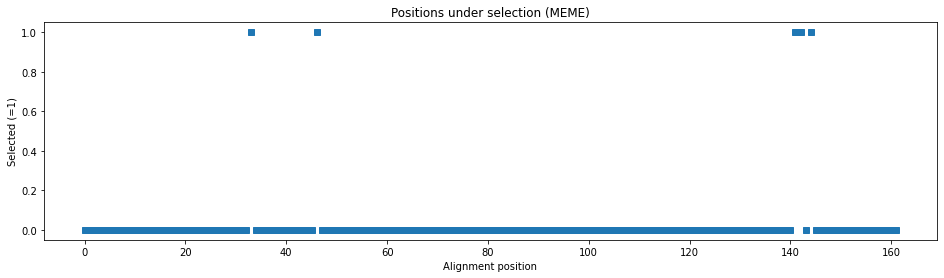

In [ ]:
# ==== PLOT 1 — Selected sites along alignment ====
plt.figure(figsize=(16,4))
plt.plot(mask, marker='s', linestyle="", markersize=6)
plt.title("Positions under selection (MEME)")
plt.xlabel("Alignment position")
plt.ylabel("Selected (=1)")
plt.show()


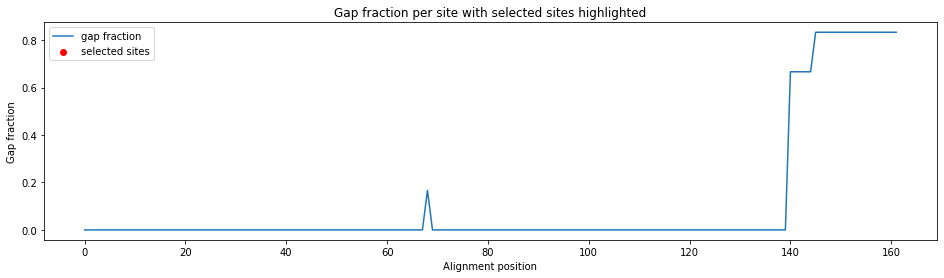

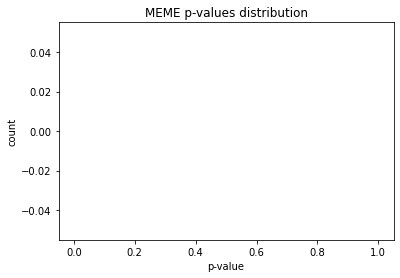

In [52]:
# ==== PLOT 2 — Gap fraction + selected sites overlay ====
plt.figure(figsize=(16,4))
plt.plot(gap_fraction, label="gap fraction")
plt.scatter(
    [i-1 for i in selected_sites],
    [gap_fraction[i-1] for i in selected_sites],
    color="red",
    label="selected sites",
    zorder=5
)
plt.title("Gap fraction per site with selected sites highlighted")
plt.xlabel("Alignment position")
plt.ylabel("Gap fraction")
plt.legend()
plt.show()

# ==== PLOT 3 — Histogram of p-values ====
plt.figure(figsize=(6,4))
plt.hist(pvalues, bins=20)
plt.title("MEME p-values distribution")
plt.xlabel("p-value")
plt.ylabel("count")
plt.show()